# Data Exploration:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')



import clean

In [2]:
df = pd.read_csv('KS_train_data.csv')

In [3]:
df

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,...,launched_at,name,pledged,staff_pick,usd_pledged,location,funded,subcategory,project_url,reward_url
0,KS_000000,80,"I will be an artist-in-residence at Elsewhere Studios this summer, where I will stretch my wings and see where I land!",art,3596,US,1325980505,USD,1334866560,1.000000,...,1332969260,Elsewhere Studios artist-in-residency program!,3596.00,False,3596.000000,"Paonia, CO",True,mixed media,https://www.kickstarter.com/projects/hilaryemersonlay/elsewhere-studios-artist-in-residency-program,https://www.kickstarter.com/projects/hilaryemersonlay/elsewhere-studios-artist-in-residency-program/rewards
1,KS_000001,82,1000 Artists is a public art-making installation on the Washington Mall which will occur on January 21 and 22nd 2013.,art,4586,US,1330926084,USD,1336440145,1.000000,...,1332984145,1000 Artists: Presidential Inauguration 2013,4586.00,False,4586.000000,"Washington, DC",True,public art,https://www.kickstarter.com/projects/17146650/1000-artists-presidential-inauguration-2013,https://www.kickstarter.com/projects/17146650/1000-artists-presidential-inauguration-2013/rewards
2,KS_000002,21,"The Sequel to ‘My Favorite Machine”, ""MyPhoneHenge"" celebrates Community across Virtual and Real Worlds.",art,5217,US,1332382894,USD,1338175739,1.000000,...,1332991739,MyPhoneHenge,5217.00,False,5217.000000,"Frisco, TX",True,sculpture,https://www.kickstarter.com/projects/belveal/myphonehenge,https://www.kickstarter.com/projects/belveal/myphonehenge/rewards
3,KS_000003,37,A film exploring the role and value of art education today through the history of the seminal California Institute of the Arts.,art,7160,GB,1332342451,USD,1334806096,1.000000,...,1332991696,Walk-Through,7160.00,False,7160.000000,"Glasgow, UK",True,art,https://www.kickstarter.com/projects/1078130915/walk-through,https://www.kickstarter.com/projects/1078130915/walk-through/rewards
4,KS_000004,153,"We need to build a kitchen for Habitable Spaces, a self sustaining farm and artist residency on a ranch in Texas.",art,15445,US,1328562617,USD,1335584240,1.000000,...,1332992240,A kitchen for Habitable Spaces,15445.00,False,15445.000000,"Kingsbury, TX",True,public art,https://www.kickstarter.com/projects/1044092769/a-kitchen-for-habitable-spaces,https://www.kickstarter.com/projects/1044092769/a-kitchen-for-habitable-spaces/rewards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,KS_099995,104,Make the workshop/ small stage space at Jimmy's No 43 even better than before!,theater,7595,US,1348677893,USD,1356552252,1.000000,...,1353960252,"Help Fund the ""Back Room"" Arts Space at Jimmy's No 43!",7595.43,False,7595.430000,"New York, NY",True,spaces,https://www.kickstarter.com/projects/jimmycarbone/help-fund-the-back-room-arts-space-at-jimmys-no-43,https://www.kickstarter.com/projects/jimmycarbone/help-fund-the-back-room-arts-space-at-jimmys-no-43/rewards
99996,KS_099996,307,Help create a permanent home for live comedy shows and classes in Downtown RVA.,theater,27196,US,1364939099,USD,1367674009,1.000000,...,1365082009,The Coalition Theater,27196.71,False,27196.710000,"Richmond, VA",True,spaces,https://www.kickstarter.com/projects/rvacomedy/the-coalition-theater-0,https://www.kickstarter.com/projects/rvacomedy/the-coalition-theater-0/rewards
99997,KS_099997,143,"Voix de Ville is a pop-up imaginarium of neo-vaudeville, musical extravaganza, circus arts, comedy, and theatre in a tiny circus tent!",theater,7226,US,1366078694,USD,1373738400,1.000000,...,1370568560,The Voix De Ville! : A Pop-up Theater and Cabaret,7226.00,True,7226.000000,"Cleveland, OH",True,spaces,https://www.kickstarter.com/projects/1601712092/the-voix-de-ville-a-pop-up-theater-and-cabaret,https://www.kickstarter.com/projects/1601712092/the-voix-de-ville-a-pop-up-theater-and-cabaret/rewards
99998,KS_099998,329,Help Synetic Theater create a new Studio to produce

In [4]:
# remvoe uneeded columns
df = df.drop(['pledged', 'usd_pledged', 'converted_pledged_amount', 'backers_count'], axis=1)

In [5]:
# days before launching
df['dbl'] = df.apply(lambda x: (datetime.fromtimestamp(x.launched_at - x.created_at) - datetime.fromtimestamp(0)).days , axis=1)


In [6]:
# days before deadline 
df['dbd'] = df.apply(lambda x: (datetime.fromtimestamp(x.deadline - x.launched_at) - datetime.fromtimestamp(0)).days , axis=1)

<AxesSubplot:xlabel='funded', ylabel='dbd'>

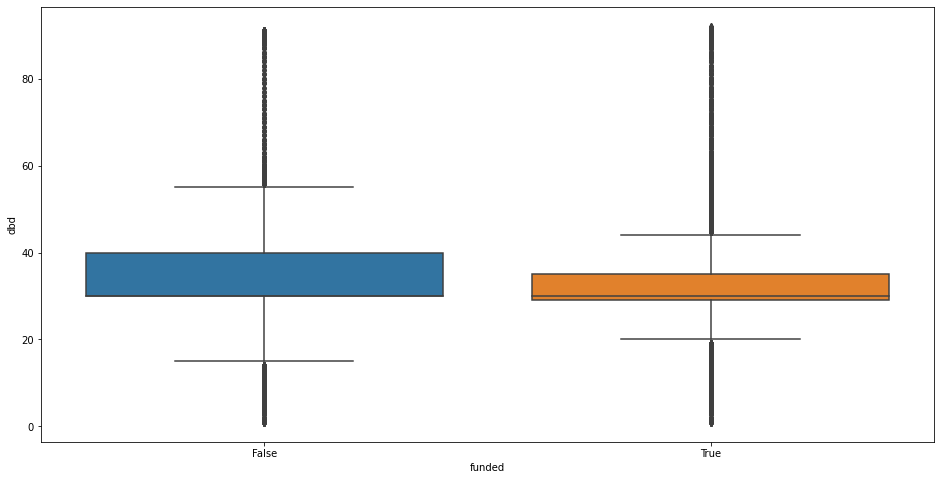

In [7]:
sns.boxplot(df.funded, df.dbd)

In [8]:
df.describe()

,created_at,deadline,fx_rate,goal,launched_at,dbl,dbd
count,1.000000e+05,1.000000e+05,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000
mean,1.400524e+09,1.406896e+09,1.017654,4.447512e+04,1.403972e+09,39.426270,33.624290
std,6.334581e+07,6.340574e+07,0.169773,1.256033e+06,6.360489e+07,103.407556,12.926677
min,1.240366e+09,1.243556e+09,0.009337,1.000000e-02,1.240674e+09,0.000000,1.000000
25%,1.349203e+09,1.357171e+09,1.000000,1.500000e+03,1.354313e+09,2.000000,30.000000
50%,1.408426e+09,1.415244e+09,1.000000,5.000000e+03,1.412373e+09,9.000000,30.000000
75%,1.447206e+09,1.454243e+09,1.000000,1.200000e+04,1.451252e+09,32.000000,36.000000
max,1.517539e+09,1.518702e+09,1.401112,1.000000e+08,1.518037e+09,2220.000000,91.000000


In [8]:
df[df.goal < (df.goal.min() + 50)]

,project_id,blurb,category,country,created_at,currency,deadline,fx_rate,goal,launched_at,name,staff_pick,location,funded,subcategory,project_url,reward_url,dbl,dbd
87,KS_000087,"imagine roaming the world’s largest ocean year after year alone, calling out with the regularity of a metronome, & hearing no response.",art,US,1326603494,USD,1327210447,1.000000,5.0,1326605647,the loneliest mix ⌃ 48,False,"Los Angeles, CA",True,mixed media,https://www.kickstarter.com/projects/mikea/the-loneliest-mix-48,https://www.kickstarter.com/projects/mikea/the-loneliest-mix-48/rewards,0,7
93,KS_000093,"I like painting and need your ideas. Pick something and I'll paint it. Marcellus Wallace staring into Butch's car, The Bear Jew, etc",art,US,1326392658,USD,1327623088,1.000000,50.0,1326413488,Weirdo Pop Art,False,"Cincinnati, OH",True,painting,https://www.kickstarter.com/projects/gallagher/weirdo-pop-art,https://www.kickstarter.com/projects/gallagher/weirdo-pop-art/rewards,0,14
113,KS_000113,"A public installation art piece involving hundreds of QR code-stamped vinyl records, a newsroom, and a meta QR Code mural.",art,US,1323968241,USD,1327973400,1.000000,50.0,1325047052,Volkrekord QR Code Newsroom Installation,True,"Pittsburgh, PA",True,public art,https://www.kickstarter.com/projects/1682341284/volkrekord-qr-code-newsroom-installation,https://www.kickstarter.com/projects/1682341284/volkrekord-qr-code-newsroom-installation/rewards,12,33
170,KS_000170,My art can go where I cannot. I've never left this country. With your help we can put stickers everywhere in the world. And maybe space,art,US,1322156569,USD,1323022454,1.000000,5.0,1322158454,International Sticker Graffiti,False,"Columbia, SC",True,public art,https://www.kickstarter.com/projects/tododelsur/international-sticker-graffiti,https://www.kickstarter.com/projects/tododelsur/international-sticker-graffiti/rewards,0,10
181,KS_000181,"imagine roaming the world’s largest ocean year after year alone, calling out with the regularity of a metronome, & hearing no response.",art,US,1321422593,USD,1321859165,1.000000,5.0,1321427165,the loneliest mix ⌃ 41,True,"Los Angeles, CA",True,mixed media,https://www.kickstarter.com/projects/mikea/the-loneliest-mix-41,https://www.kickstarter.com/projects/mikea/the-loneliest-mix-41/rewards,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98956,KS_098956,Machine Learning can now be done in the web browser. I will make at least 5 Machine Learning YouTube tutorials in a playlist,technology,CA,1508213319,CAD,1512657717,0.795439,1.0,1509543717,Joe Javascript's Machine Learning Tutorials,False,"Abbotsford, Canada",True,web,https://www.kickstarter.com/projects/rocksetta/joe-javascripts-machine-learning-tutorials,https://www.kickstarter.com/projects/rocksetta/joe-javascripts-machine-learning-tutorials/rewards,15,36
99472,KS_099472,"Multi-award winning, original musical highlighting the impact mental health issues can have on young people & battling stigma.",theater,GB,1437931275,GBP,1445990400,1.389543,1.0,1440850335,Battle Scars: A New Musical,False,"Cardiff, UK",True,musical,https://www.kickstarter.com/projects/1186998743/battle-scars-a-new-musical,https://www.kickstarter.com/projects/1186998743/battle-scars-a-new-musical/rewards,33,59
99523,KS_099523,Pfoho's inaugural PfBachelor of the Month has agreed to go on a date if $40 is fundraised. Help Harrison Chase find his soulmate!,theater,US,1429720252,USD,1431711660,1.000000,40.0,1429726844,Get Harry to Go on a Date,False,"Cambridge, MA",False,experimental,https://www.kickstarter.com/projects/1291138347/get-harry-to-go-on-a-date,https://www.kickstarter.com/projects/1291138347/get-harry-to-go-on-a-date/rewards,0,22
99533,KS_099533,"I need $ to buy a hammer so I can attempt to destroy an infamously indestructible Nokia 3310 with it. I do not say ""attempt"" lightly.",theater,US,1426541807,USD,1429138003,1.000000,20.0,1426546003,I will attempt to destroy a Nokia 3310.,False,"St. Louis, MO"

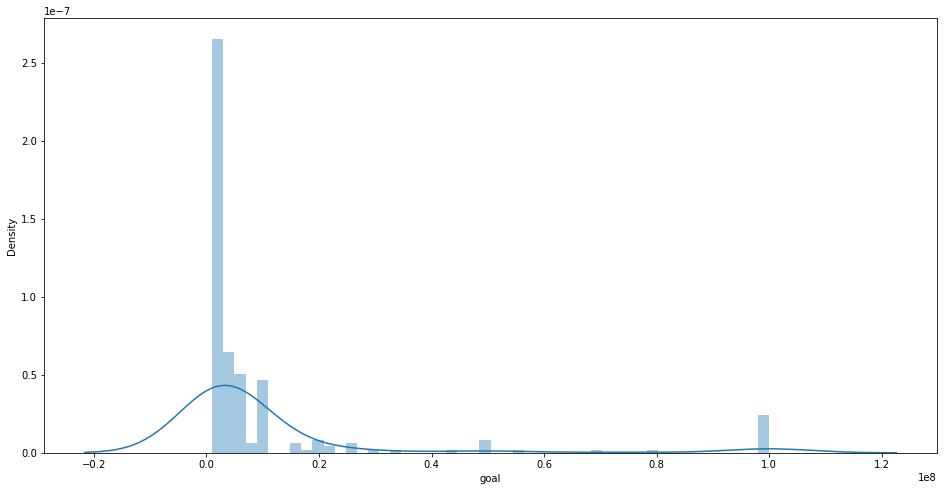

In [9]:
sns.distplot(df.goal[df.goal > 1000000]);

((array([-4.34602155, -4.14724578, -4.03913009, ...,  4.03913009,
          4.14724578,  4.34602155]),
  array([1240673781, 1240966730, 1240980224, ..., 1517567284, 1517612471,
         1518036633], dtype=int64)),
 (62683672.38267691, 1403972055.80957, 0.9854783082871486))

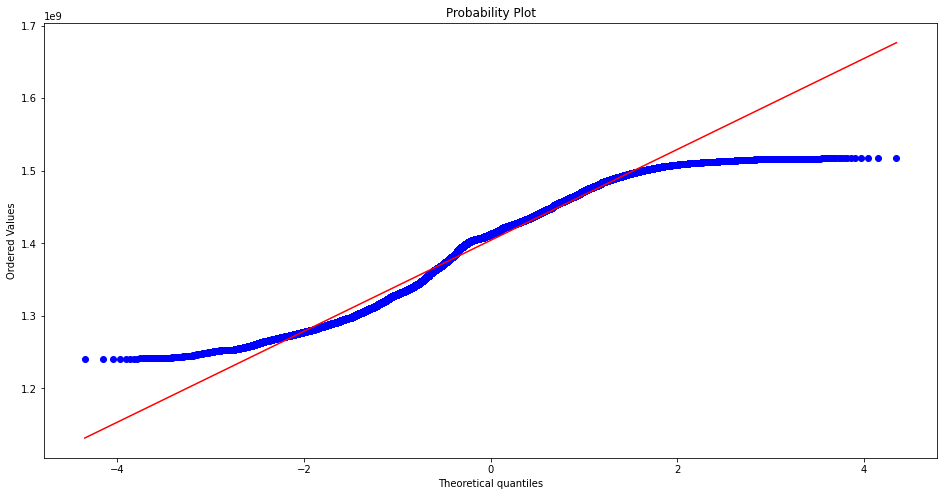

In [10]:
stats.probplot(df.launched_at, plot=plt)

In [11]:
df = clean.remove_unneeded(df)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
text = clean.clean(df, False, 'blurb').blurb
vectorizer.fit(text)
# summarize
# print(vectorizer.vocabulary_)
# print(vectorizer.idf_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(99996, 59227)


MemoryError: Unable to allocate 44.1 GiB for an array with shape (99996, 59227) and data type float64

In [29]:
from scipy import sparse
# type(csr_matrix.todense(vector))
# f['vec_blurb'] = vector
# sparse.save_npz("Csr_sparse_matrix_blurb.npz", vector)

matrix_back = sparse.load_npz("Csr_sparse_matrix_blurb.npz")

<AxesSubplot:>

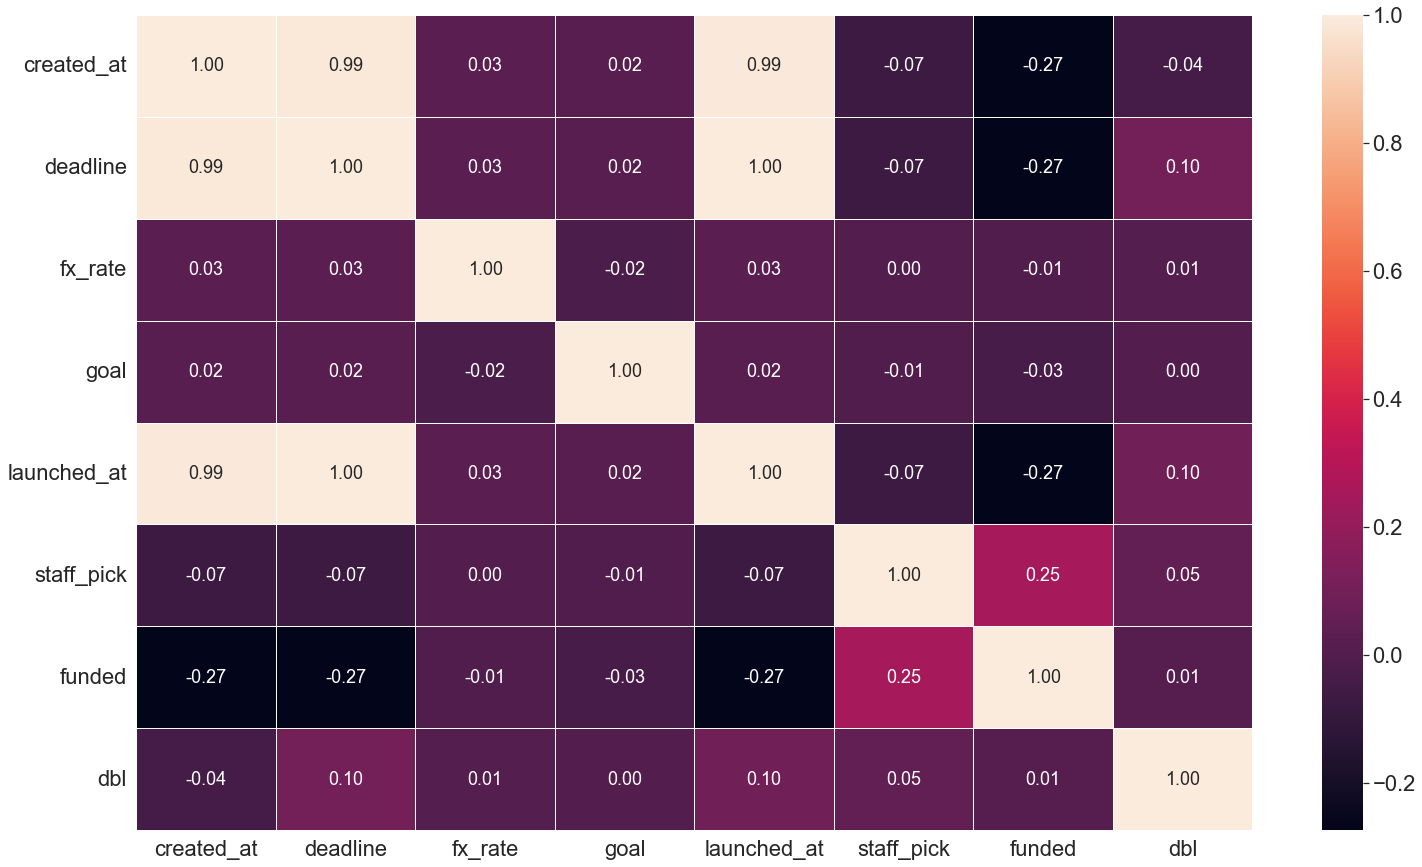

In [31]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(25,15))         # Sample figsize in inches
sns.set(font_scale=2)
sns.heatmap(corrmat, annot=True, linewidths=.5, ax=ax, fmt = ".2f", annot_kws={"size":18})

In [80]:
df['funded'] = df.funded.transform(int)
df['staff_pick'] = df.staff_pick.transform(int)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='launched_at', ylabel='deadline'>

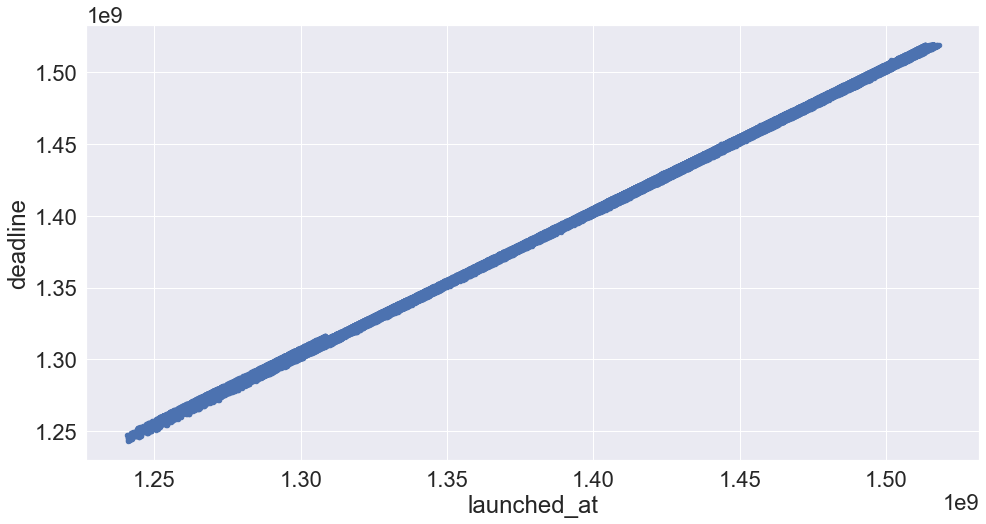

In [110]:
df.plot.scatter('launched_at', 'deadline')

<AxesSubplot:xlabel='funded', ylabel='goal'>

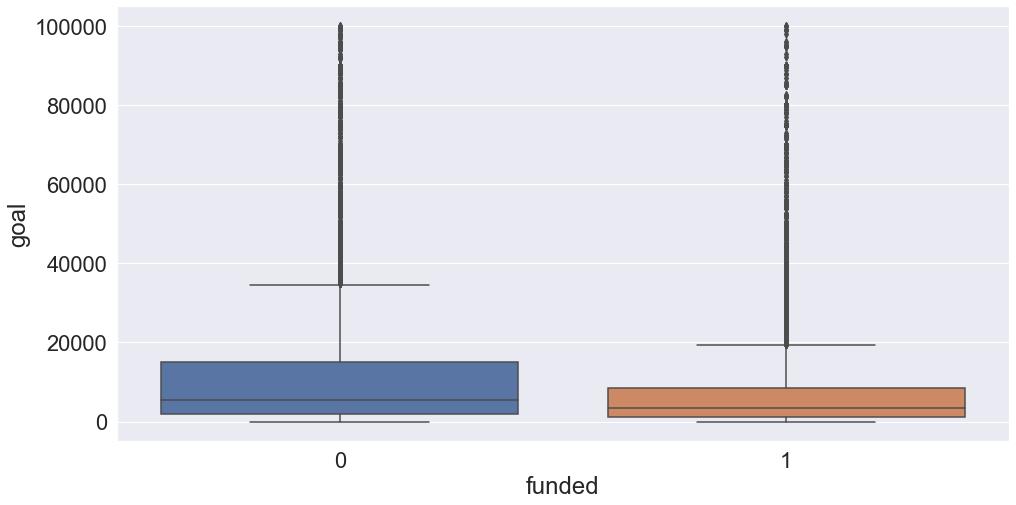

In [79]:
sns.boxplot(df['funded'].transform(int), df.goal[df['goal']<100000])

In [81]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))
#    false true 
# 0|  0      1
# 1|  1      0 
# 2|  0      1 

print('The categorical variables are :\n\n', categorical)

There are 10 categorical variables

The categorical variables are :

 ['project_id', 'blurb', 'category', 'country', 'currency', 'name', 'location', 'subcategory', 'project_url', 'reward_url']


# observations
From the heat map, not much could be said about the data, except that the number of backers (backer_count) correlates witht the pledged money. Other than that, is that there is a small correlation (o.25) between staff_pick and funded. There is also some correlation with the times that we will not go into as those are most probably not very informative.

However, we know that the heat map does not show us any categorical data. Hence, we plot some could-be interesting features.

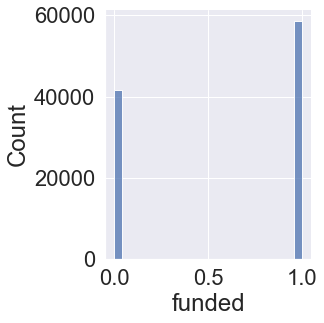

In [6]:
# distribution of funded campaigns 
sns.displot(df.funded.transform(int))
# almost 59% were funded project and 39% not

Here we plot the intial goal and wether it has been funded or not

<AxesSubplot:xlabel='funded', ylabel='goal'>

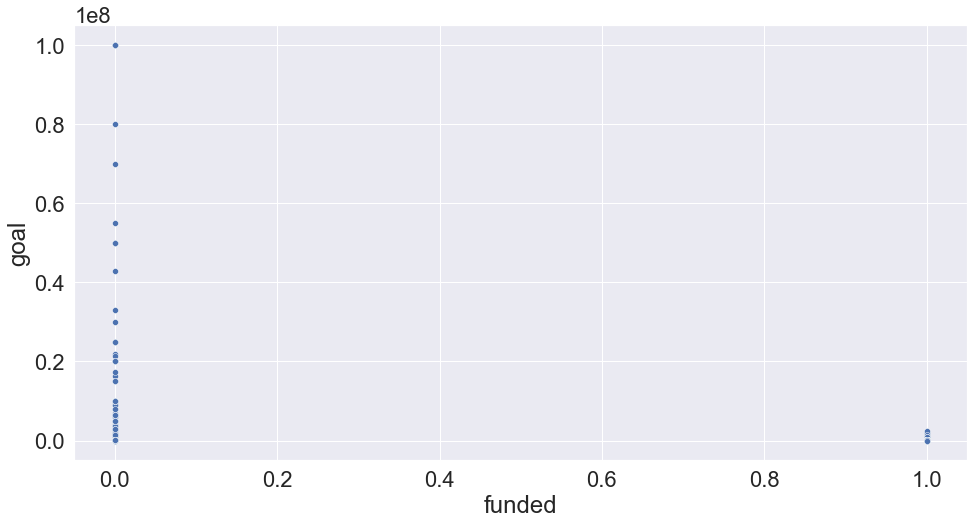

In [7]:
sns.scatterplot(df.funded.transform(int), df.goal)

Here we can already see that all of the funded campaigns have approximatly the same range (goal amount). As for the not funded they are more distributed, even some outliers could be noticed. 
## hence goal is an important feature

Next we plot funded against the category and sub category, but first we need to one-hot encode those categorical data.

In [86]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()

In [96]:
def encoded(feature):
    enc = preprocessing.OneHotEncoder()
    enc.fit(np.asarray(df[feature]).reshape(-1, 1))
    encoded_cat = enc.transform(np.asarray(df[feature]).reshape(-1,1))
    print(encoded_cat.shape)
    enc.get_feature_names()
    return enc, encoded_cat

In [97]:
enc, enc_cat = encoded('funded')

(100000, 2)


In [106]:
enc, enc_cat = encoded('category')

(100000, 15)


In [9]:
# first we do categories
enc.fit(np.asarray(df.category).reshape(-1, 1))
encoded_cat = enc.transform(np.asarray(df.category).reshape(-1,1))
print(encoded_cat.shape)
enc.get_feature_names()

(100000, 15)


array(['x0_art', 'x0_comics', 'x0_crafts', 'x0_dance', 'x0_design',
       'x0_fashion', 'x0_film & video', 'x0_food', 'x0_games',
       'x0_journalism', 'x0_music', 'x0_photography', 'x0_publishing',
       'x0_technology', 'x0_theater'], dtype=object)

# TODO

Since US is the most occuring in the data, we fill the three missing values in the country columns with US.

In [10]:
# here we plot it against funded











In [25]:
df.country = df.country.fillna(df.country.mode().iloc[0])
df.country.isnull().sum()

0

As for the 2 missing blurbs and 1 name, it happens to be that one row is missing both the blurb and the name, this will be dropped.

The other row is only missing the blurb, however after checking the link provided it happens to be that the information provided in the website is curropted such that the information about that campaing are not available, hence this also will be dropped.

In [26]:
# the rows before 
df[df.isnull().any(axis=1)]

,project_id,blurb,category,country,created_at,currency,deadline,fx_rate,goal,launched_at,name,staff_pick,location,funded,subcategory,project_url,reward_url,dbl,dbd
5423,KS_005423,NaN,art,US,1320612894,USD,1323061140,1.000000,35000.0,1320620155,NaN,False,"Milan, IN",False,painting,https://www.kickstarter.com/projects/1751437608/you-have-the-power-to-put-our-film-in-theaters,https://www.kickstarter.com/projects/1751437608/you-have-the-power-to-put-our-film-in-theaters/rewards,0,28
27780,KS_027780,NaN,fashion,DE,1504364375,EUR,1507625188,1.245664,15000.0,1505033188,Ready to wear,False,"Munich, Germany",False,ready-to-wear,https://www.kickstarter.com/projects/1303591875/serious-business-collection,https://www.kickstarter.com/projects/1303591875/serious-business-collection/rewards,7,30


In [26]:
df = df.drop([5423, 27780])

# remove float numbers from blurb
df = df.drop([31717, 50117])

In [28]:
# the rows after are gone
df[df.isnull().any(axis=1)]

,project_id,blurb,category,country,created_at,currency,deadline,fx_rate,goal,launched_at,name,staff_pick,location,funded,subcategory,project_url,reward_url,dbl,dbd


In [24]:
df.blurb[df.blurb.str.isnumeric()]

31717    1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
50117                                                                                                       1
Name: blurb, dtype: object

In [11]:
# second we do sub-categories
enc.fit(np.asarray(df.subcategory).reshape(-1, 1))
encoded_subcat = enc.transform(np.asarray(df.subcategory).reshape(-1,1))
print(encoded_subcat.shape)
enc.get_feature_names()

(100000, 158)


array(['x0_3d printing', 'x0_academic', 'x0_accessories', 'x0_action',
       'x0_animals', 'x0_animation', 'x0_anthologies', 'x0_apparel',
       'x0_apps', 'x0_architecture', 'x0_art', 'x0_art books', 'x0_audio',
       'x0_bacon', 'x0_blues', 'x0_calendars', 'x0_camera equipment',
       'x0_candles', 'x0_ceramics', "x0_children's books",
       'x0_childrenswear', 'x0_chiptune', 'x0_civic design',
       'x0_classical music', 'x0_comedy', 'x0_comic books', 'x0_comics',
       'x0_community gardens', 'x0_conceptual art', 'x0_cookbooks',
       'x0_country & folk', 'x0_couture', 'x0_crafts', 'x0_crochet',
       'x0_dance', 'x0_design', 'x0_digital art', 'x0_diy',
       'x0_diy electronics', 'x0_documentary', 'x0_drama', 'x0_drinks',
       'x0_electronic music', 'x0_embroidery', 'x0_events',
       'x0_experimental', 'x0_fabrication tools', 'x0_faith', 'x0_family',
       'x0_fantasy', "x0_farmer's markets", 'x0_farms', 'x0_festivals',
       'x0_fiction', 'x0_film & video', 'x0_fi

# TODO

In [12]:
# and we plot it against funded






In [13]:
# we also one hot encode countries and see if that could have any correlaion with the campaign being funded or not
enc.fit(np.asarray(df.country).reshape(-1, 1))
encoded_country = enc.transform(np.asarray(df.country).reshape(-1,1))
print(encoded_country.shape)
enc.get_feature_names()

(100000, 175)


array(['x0_?', 'x0_AE', 'x0_AF', 'x0_AG', 'x0_AM', 'x0_AQ', 'x0_AR',
       'x0_AT', 'x0_AU', 'x0_AX', 'x0_BA', 'x0_BB', 'x0_BD', 'x0_BE',
       'x0_BF', 'x0_BG', 'x0_BJ', 'x0_BO', 'x0_BR', 'x0_BS', 'x0_BT',
       'x0_BY', 'x0_BZ', 'x0_CA', 'x0_CD', 'x0_CF', 'x0_CG', 'x0_CH',
       'x0_CI', 'x0_CK', 'x0_CL', 'x0_CM', 'x0_CN', 'x0_CO', 'x0_CR',
       'x0_CU', 'x0_CW', 'x0_CY', 'x0_CZ', 'x0_DE', 'x0_DJ', 'x0_DK',
       'x0_DM', 'x0_DO', 'x0_DZ', 'x0_EC', 'x0_EE', 'x0_EG', 'x0_ES',
       'x0_ET', 'x0_FI', 'x0_FJ', 'x0_FM', 'x0_FO', 'x0_FR', 'x0_GA',
       'x0_GB', 'x0_GE', 'x0_GH', 'x0_GL', 'x0_GM', 'x0_GN', 'x0_GP',
       'x0_GQ', 'x0_GR', 'x0_GT', 'x0_GU', 'x0_GY', 'x0_HK', 'x0_HN',
       'x0_HR', 'x0_HT', 'x0_HU', 'x0_ID', 'x0_IE', 'x0_IL', 'x0_IN',
       'x0_IQ', 'x0_IR', 'x0_IS', 'x0_IT', 'x0_JM', 'x0_JO', 'x0_JP',
       'x0_KE', 'x0_KG', 'x0_KH', 'x0_KP', 'x0_KR', 'x0_KW', 'x0_KZ',
       'x0_LA', 'x0_LB', 'x0_LC', 'x0_LK', 'x0_LR', 'x0_LT', 'x0_LU',
       'x0_LV', 'x0_L

# TODO

In [14]:
# and we plot it against funded












### Dealing with Null values

In [22]:
#Null values
df.isnull().sum()

project_id     0
blurb          2
category       0
country        3
created_at     0
currency       0
deadline       0
fx_rate        0
goal           0
launched_at    0
name           1
staff_pick     0
location       0
funded         0
subcategory    0
project_url    0
reward_url     0
dbl            0
dbd            0
dtype: int64

In total there are 2 blurbs, 3 countries, and 1 name missing. 

In [23]:
#Rows with null values
df[df.isnull().any(axis=1)]

,project_id,blurb,category,country,created_at,currency,deadline,fx_rate,goal,launched_at,name,staff_pick,location,funded,subcategory,project_url,reward_url,dbl,dbd
1857,KS_001857,"A light artist interested the universal urge to connect through mark making, I aim to travel and learn from the San Tribes of Namibia.",art,NaN,1492523493,USD,1499097394,1.000000,7000.0,1495209394,Ancient Rock Art and the San Tribes of Namibia,False,"Windhoek, Namibia",False,conceptual art,https://www.kickstarter.com/projects/1133917994/ancient-rock-art-and-the-san-tribes-of-namibia,https://www.kickstarter.com/projects/1133917994/ancient-rock-art-and-the-san-tribes-of-namibia/rewards,31,45
5423,KS_005423,NaN,art,US,1320612894,USD,1323061140,1.000000,35000.0,1320620155,NaN,False,"Milan, IN",False,painting,https://www.kickstarter.com/projects/1751437608/you-have-the-power-to-put-our-film-in-theaters,https://www.kickstarter.com/projects/1751437608/you-have-the-power-to-put-our-film-in-theaters/rewards,0,28
27780,KS_027780,NaN,fashion,DE,1504364375,EUR,1507625188,1.245664,15000.0,1505033188,Ready to wear,False,"Munich, Germany",False,ready-to-wear,https://www.kickstarter.com/projects/1303591875/serious-business-collection,https://www.kickstarter.com/projects/1303591875/serious-business-collection/rewards,7,30
46838,KS_046838,"We're from the Kavango Region in Namibia. We finished our high school degree, and now we are starting a butchery to pay for college.",food,NaN,1445612769,USD,1449950496,1.000000,1500.0,1447358496,Butcher Boys of Bagani,False,"Rundu, Namibia",True,food trucks,https://www.kickstarter.com/projects/823745415/butcher-boys-of-bagani,https://www.kickstarter.com/projects/823745415/butcher-boys-of-bagani/rewards,20,30
56883,KS_056883,"I am heading on a 5 Gyres Voyage in JAN 2011 to study plastic pollution in the South Atlantic Ocean with other activists, artists and scientists.",journalism,NaN,1286564530,USD,1291845600,1.000000,3500.0,1288295782,ON A BOAT to raise awareness on PLASTIC POLLUTION,False,"Walvis Bay, Namibia",True,journalism,https://www.kickstarter.com/projects/1639372997/on-a-boat-to-raise-awareness-on-plastic-pollution-0,https://www.kickstarter.com/projects/1639372997/on-a-boat-to-raise-awareness-on-plastic-pollution-0/rewards,20,41


In [24]:
# Median of the country column 
df.country.value_counts()

US    76716
GB     8015
CA     3511
AU     1793
DE      969
      ...  
AX        1
GQ        1
CW        1
ME        1
UY        1
Name: country, Length: 174, dtype: int64

# Feature derivation:

# Modelling:

# Evaluation:

# Observations

<AxesSubplot:ylabel='goal'>

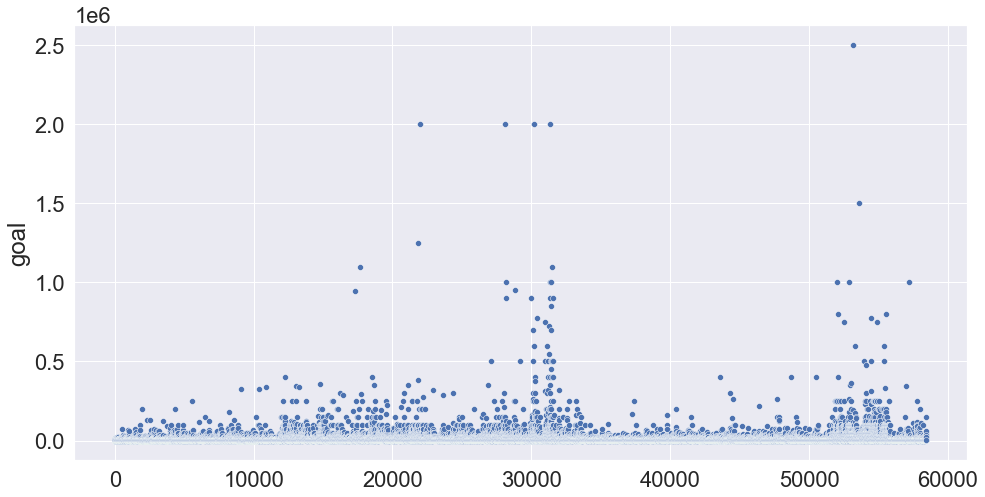

In [55]:

pos_idx = df[df['funded'] == True].index.tolist()
sns.scatterplot(np.arange(len(pos_idx)), df.goal[pos_idx])

<AxesSubplot:ylabel='goal'>

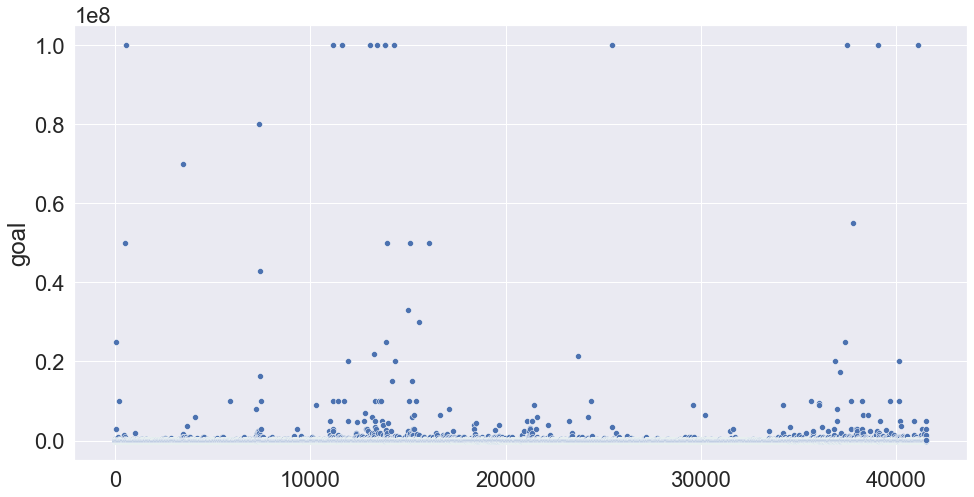

In [54]:
neg_idx = df[df['funded'] == False].index.tolist()
sns.scatterplot(np.arange(len(neg_idx)), df.goal[neg_idx])